In [1]:
import pickle
import torch
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [3]:
def load_results(method='ma', metric='ma_test'):
    results_all = []
    for run_id in range(10, 13):
        with open('results/var/%s-noval-False-run=%d.pickle' % (method, run_id), 'rb') as f:
            result = pickle.load(f)
            results_all.append(torch.stack(result[metric][1:]))
    results_all = torch.stack(results_all).detach().cpu() 
    return results_all

def plot_err(arr, color, label, ls='-'):
    plt.plot(range(10), arr.mean(dim=0), c=color, label=label, linestyle=ls)
    plt.fill_between(range(10), arr.mean(dim=0) - arr.std(dim=0), arr.mean(dim=0) + arr.std(dim=0), alpha=0.3, color=color)



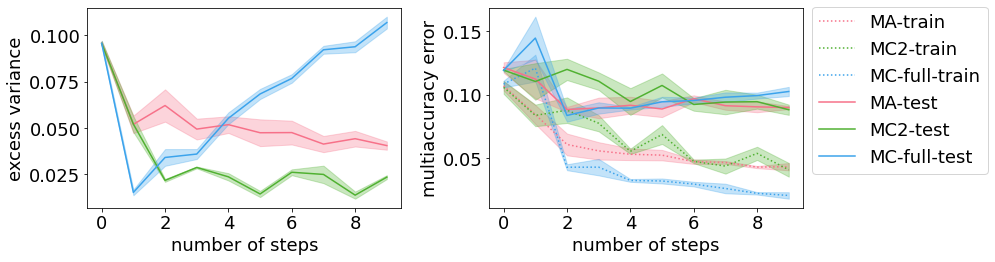

In [5]:

import seaborn as sns
palette = sns.color_palette('husl', 3)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)

plot_err(load_results('ma', 'var_test'), palette[0], 'MA-test')
plot_err(load_results('alternate', 'var_test'), palette[1], 'MC2-test')
plot_err(load_results('mc', 'var_test'), palette[2], 'MC-int-test')

plt.xlabel('number of steps')
plt.ylabel('excess variance')

plt.subplot(1, 2, 2)
# plot_err(load_results('ma', 'var_train'), palette[0], 'ma-train', ':')
# plot_err(load_results('alternate', 'var_train'), palette[1], 'deg2-train', ':')

plot_err(load_results('ma', 'ma_train'), palette[0], 'MA-train', ':')
plot_err(load_results('alternate', 'ma_train'), palette[1], 'MC2-train', ':')
plot_err(load_results('mc', 'ma_train'), palette[2], 'MC-full-train', ':')

plot_err(load_results('ma', 'ma_test'), palette[0], 'MA-test')
plot_err(load_results('alternate', 'ma_test'), palette[1], 'MC2-test')
plot_err(load_results('mc', 'ma_test'), palette[2], 'MC-full-test')

plt.xlabel('number of steps')
plt.ylabel('multiaccuracy error')

plt.legend(bbox_to_anchor=(1, 1.05),)


plt.tight_layout()
plt.savefig('results/var/plot.png', dpi=300)
plt.show()